# Desafio 6

Neste desafio, vamos praticar _feature engineering_, um dos processos mais importantes e trabalhosos de ML. Utilizaremos o _data set_ [Countries of the world](https://www.kaggle.com/fernandol/countries-of-the-world), que contém dados sobre os 227 países do mundo com informações sobre tamanho da população, área, imigração e setores de produção.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [18]:

import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk

#Pacotes para as questões 2 e 3
from sklearn.preprocessing import (
    OneHotEncoder, Binarizer, KBinsDiscretizer,
    MinMaxScaler, StandardScaler, PolynomialFeatures
)

#Pacote para a questão 4
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

#Pacotes para as questões 6 e 7
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import (
    CountVectorizer, TfidfVectorizer
)

In [19]:
# Algumas configurações para o matplotlib.
#%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [20]:
countries = pd.read_csv("countries.csv")

In [21]:
new_column_names = [
    "Country", "Region", "Population", "Area", "Pop_density", "Coastline_ratio",
    "Net_migration", "Infant_mortality", "GDP", "Literacy", "Phones_per_1000",
    "Arable", "Crops", "Other", "Climate", "Birthrate", "Deathrate", "Agriculture",
    "Industry", "Service"
]

countries.columns = new_column_names

countries.head(5)

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


## Observações

Esse _data set_ ainda precisa de alguns ajustes iniciais. Primeiro, note que as variáveis numéricas estão usando vírgula como separador decimal e estão codificadas como strings. Corrija isso antes de continuar: transforme essas variáveis em numéricas adequadamente.

Além disso, as variáveis `Country` e `Region` possuem espaços a mais no começo e no final da string. Você pode utilizar o método `str.strip()` para remover esses espaços.

## Inicia sua análise a partir daqui

In [22]:
# Sua análise começa aqui.
countries.dtypes


Country              object
Region               object
Population            int64
Area                  int64
Pop_density          object
Coastline_ratio      object
Net_migration        object
Infant_mortality     object
GDP                 float64
Literacy             object
Phones_per_1000      object
Arable               object
Crops                object
Other                object
Climate              object
Birthrate            object
Deathrate            object
Agriculture          object
Industry             object
Service              object
dtype: object

In [23]:
lista = list(countries.select_dtypes(exclude = ['int64', 'float64']))

#Removendo Country e Region da lista
del lista[0:2]

In [24]:
#transformando as variaves numericas
countries[lista] = countries[lista].replace(',', '.', regex = True).astype(float)

In [25]:
#removando espaços
countries['Country'] = countries['Country'].str.strip()
countries['Region'] = countries['Region'].str.strip()

## Questão 1

Quais são as regiões (variável `Region`) presentes no _data set_? Retorne uma lista com as regiões únicas do _data set_ com os espaços à frente e atrás da string removidos (mas mantenha pontuação: ponto, hífen etc) e ordenadas em ordem alfabética.

In [26]:
def q1():
    # Retorne aqui o resultado da questão 1.
    regioes_unicas = pd.Series(countries['Region'].unique())
    return list(regioes_unicas.sort_values(ascending = True))

## Questão 2

Discretizando a variável `Pop_density` em 10 intervalos com `KBinsDiscretizer`, seguindo o encode `ordinal` e estratégia `quantile`, quantos países se encontram acima do 90º percentil? Responda como um único escalar inteiro.

In [27]:
def q2():
    discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
    bin_pop_density = discretizer.fit_transform(countries[['Pop_density']])
        
    return int(sum(bin_pop_density[:, 0] == 9))

# Questão 3

Se codificarmos as variáveis `Region` e `Climate` usando _one-hot encoding_, quantos novos atributos seriam criados? Responda como um único escalar.

In [28]:
def q3():
     #Transformando o dataset com one-hot encoding
    one_hot_encoder = OneHotEncoder(sparse=False, dtype = np.int)
    region_climate_encoded = one_hot_encoder.fit_transform(countries[['Region', 'Climate']].fillna('').astype('str'))
    
    #Retornando a quantidade de novos atributos criados
    return region_climate_encoded.shape[1]

## Questão 4

Aplique o seguinte _pipeline_:

1. Preencha as variáveis do tipo `int64` e `float64` com suas respectivas medianas.
2. Padronize essas variáveis.

Após aplicado o _pipeline_ descrito acima aos dados (somente nas variáveis dos tipos especificados), aplique o mesmo _pipeline_ (ou `ColumnTransformer`) ao dado abaixo. Qual o valor da variável `Arable` após o _pipeline_? Responda como um único float arredondado para três casas decimais.

In [29]:
test_country = [
    'Test Country', 'NEAR EAST', -0.19032480757326514,
    -0.3232636124824411, -0.04421734470810142, -0.27528113360605316,
    0.13255850810281325, -0.8054845935643491, 1.0119784924248225,
    0.6189182532646624, 1.0074863283776458, 0.20239896852403538,
    -0.043678728558593366, -0.13929748680369286, 1.3163604645710438,
    -0.3699637766938669, -0.6149300604558857, -0.854369594993175,
    0.263445277972641, 0.5712416961268142
]

In [30]:
def q4():
    num_pipeline = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("standart_scaler", StandardScaler())
    ])

    numeric_features = countries.select_dtypes(include=['float64', 'int64'])
    num_pipeline.fit(numeric_features)
    test_country_transform = num_pipeline.transform([test_country[2:]])
    arable_transform = test_country_transform[:, numeric_features.columns.get_loc("Arable")]
    
    return round(arable_transform.item(), 3)

## Questão 5

Descubra o número de _outliers_ da variável `Net_migration` segundo o método do _boxplot_, ou seja, usando a lógica:

$$x \notin [Q1 - 1.5 \times \text{IQR}, Q3 + 1.5 \times \text{IQR}] \Rightarrow x \text{ é outlier}$$

que se encontram no grupo inferior e no grupo superior.

Você deveria remover da análise as observações consideradas _outliers_ segundo esse método? Responda como uma tupla de três elementos `(outliers_abaixo, outliers_acima, removeria?)` ((int, int, bool)).

In [31]:
q1_quant = countries['Net_migration'].quantile(0.25)
q3_quant = countries['Net_migration'].quantile(0.75)
iqr = q3_quant - q1_quant

non_outlier_interval_iqr = [q1_quant - 1.5 * iqr, q3_quant + 1.5 * iqr]

print(f"Faixa considerada \"normal\": {non_outlier_interval_iqr}")

Faixa considerada "normal": [-3.8149999999999995, 3.885]


In [45]:
def q5():
    data = countries['Net_migration']
    descriptive_statistics = data.describe()
    
    firt_quantile = descriptive_statistics["25%"]
    third_quantile = descriptive_statistics["75%"]
    quantile_range = third_quantile - firt_quantile
    
   
    low_limit = firt_quantile - 1.5 * quantile_range
    high_limit = third_quantile + 1.5 * quantile_range
    
    print(low_limit)
    print(high_limit)
    
    low_outliers = data[(data < low_limit)]
    high_outliers = data[(data > high_limit)]
    
    return (len(low_outliers), len(high_outliers), False)

q5()

-3.8149999999999995
3.885


(24, 26, False)

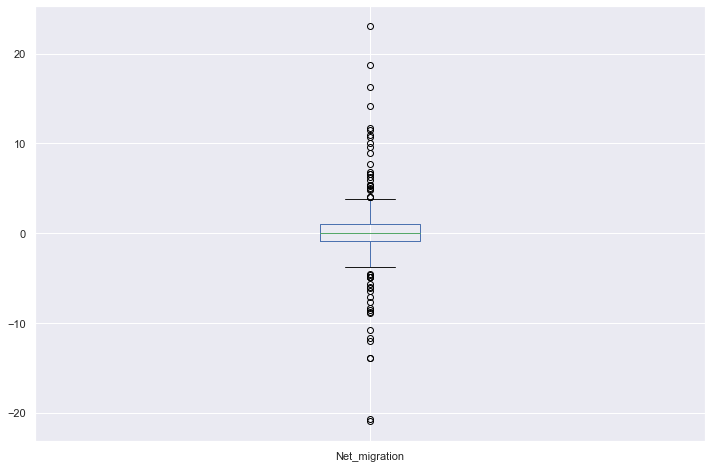

In [46]:
countries['Net_migration'].plot(kind="box")

## Questão 6
Para as questões 6 e 7 utilize a biblioteca `fetch_20newsgroups` de datasets de test do `sklearn`

Considere carregar as seguintes categorias e o dataset `newsgroups`:

```
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)
```


Aplique `CountVectorizer` ao _data set_ `newsgroups` e descubra o número de vezes que a palavra _phone_ aparece no corpus. Responda como um único escalar.

In [39]:
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']

newsgroups = fetch_20newsgroups(subset = "train", categories = categories, shuffle = True, random_state = 42)

In [43]:
def q6():
   #Transformando o dataset com CountVectorizer
    count_vectorizer = CountVectorizer()
    newsgroups_counts = count_vectorizer.fit_transform(newsgroups.data)

    #Index da palavra phone
    word_phone_idx = count_vectorizer.vocabulary_.get('phone')
    
    #Quantidade de vezes que a palavra phone aparece no corpus
    return int(newsgroups_counts[:, word_phone_idx].sum())

## Questão 7

Aplique `TfidfVectorizer` ao _data set_ `newsgroups` e descubra o TF-IDF da palavra _phone_. Responda como um único escalar arredondado para três casas decimais.

In [44]:
def q7():
    vectorizer = TfidfVectorizer().fit(newsgroups.data)
    
    newsgroups_tfidf_vectorized = vectorizer.transform(newsgroups.data)

    return float(round(newsgroups_tfidf_vectorized[:, vectorizer.vocabulary_['phone']].sum(), 3))
q7()

8.888